In [47]:
# System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


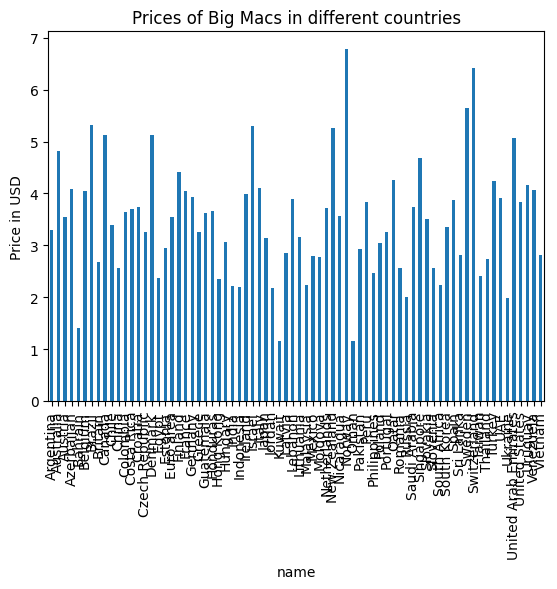

In [48]:
# Prices of Big Macs in different countries (Amar)
df_bigmac = pd.read_csv('BigmacPrice.csv')
df_bigmac = df_bigmac.drop(['date', 'dollar_ex', 'local_price', 'currency_code'], axis=1)
df_bigmac = df_bigmac.dropna()

counts = df_bigmac.groupby('name')['dollar_price'].mean()
counts = counts.sort_index()
counts.plot(kind='bar')

plt.ylabel('Price in USD')
plt.title('Prices of Big Macs in different countries')
plt.show()

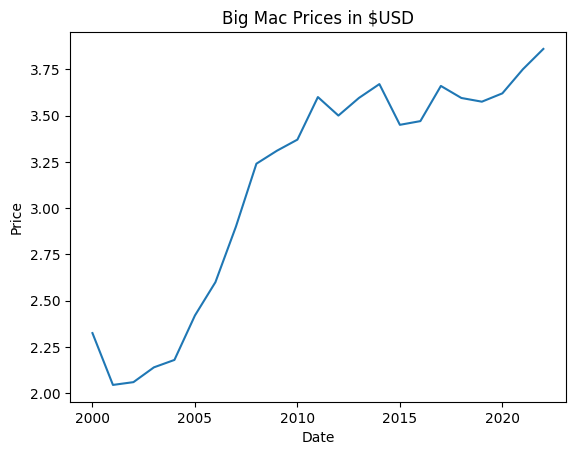

In [49]:
# Median price of Big Macs by date (Amar)
df_bigmac = pd.read_csv('BigmacPrice.csv')
df_bigmac = df_bigmac.drop(['dollar_ex', 'name', 'currency_code'], axis=1)
df_bigmac = df_bigmac.dropna()

df_bigmac['date'] = pd.to_datetime(df_bigmac['date'])
df_bigmac['date'] = df_bigmac['date'].dt.year

counts = df_bigmac.groupby('date')['dollar_price'].median()
counts = counts.sort_index()
counts.plot(kind='line')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Big Mac Prices in $USD')
plt.show()

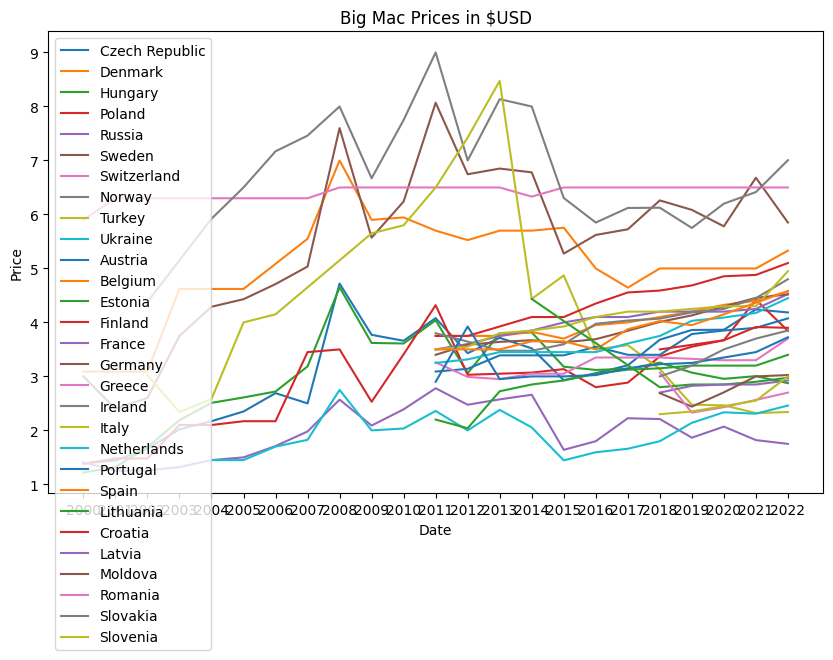

In [52]:
# Changes to the prices over the years in European Countries (Amar)
df_bigmac = pd.read_csv('BigmacPrice.csv')
df_bigmac = df_bigmac.drop(['dollar_ex', 'currency_code'], axis=1)
df_bigmac = df_bigmac.dropna()

european_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

df_bigmac = df_bigmac[df_bigmac['name'].isin(european_countries)]

df_bigmac['date'] = pd.to_datetime(df_bigmac['date'])
df_bigmac['date'] = df_bigmac['date'].dt.year

countries = df_bigmac['name'].unique()

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df_bigmac[df_bigmac['name'] == country]
    counts = country_data.groupby('date')['dollar_price'].mean()
    plt.plot(counts.index, counts.values, label=country)

plt.xticks(np.arange(min(df_bigmac['date']), max(df_bigmac['date'])+1, 1.0))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Big Mac Prices in $USD')
plt.legend()
plt.show()

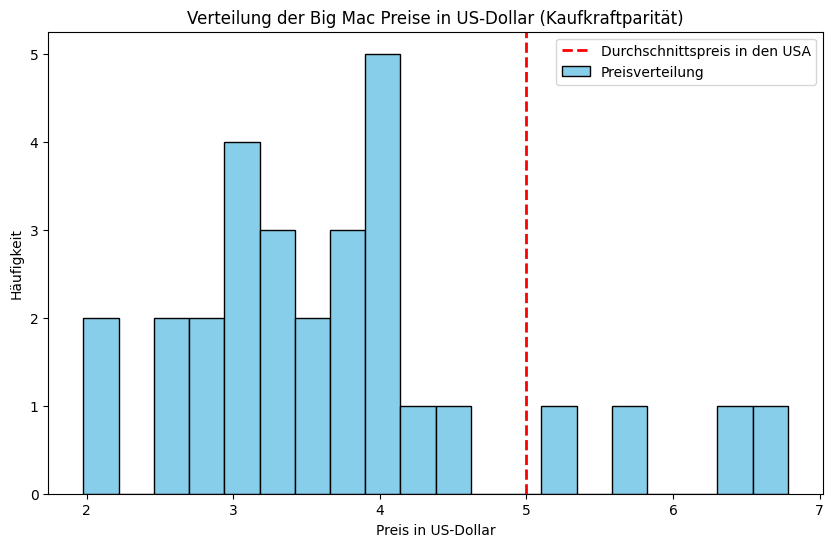

In [55]:
# Verteilung der Big Mac Preise in US-Dollar (Deniz)
df_bigmac.date = pd.to_datetime(df_bigmac.date)
df_bigmac['year'] = df_bigmac.date.dt.year
df_year = df_bigmac.groupby(['year','name']) 
df_mean = df_year.dollar_price.mean()
df_mean = df_mean.reset_index(level=[0,1])
plt.figure(figsize=(10, 6))

plt.hist(df_mean['dollar_price'], bins=20, color='skyblue', edgecolor='black')

average_us_price = 5 
plt.axvline(average_us_price, color='red', linestyle='dashed', linewidth=2)

plt.title('Verteilung der Big Mac Preise in US-Dollar (Kaufkraftparität)')
plt.xlabel('Preis in US-Dollar')
plt.ylabel('Häufigkeit')
plt.legend(['Durchschnittspreis in den USA', 'Preisverteilung'])

plt.show()